## **02. Data Cleaning & QC Verification**
---


This notebook serves as the interactive front-end for our data cleaning and quality control scripts. The workflow is as follows:<br>


    >  Run the main preprocessing pipeline (`00_make_views.py`) to get the initial preprocessed file. 
    >  Run the targeted cleaning script (`01_clean_data.py`) to fix specific errors found during QC. 
    >  Run the QC script** (`run_qc.py`) again on the cleaned file to verify that all issues are resolved. 
    >  Visually inspect the final cleaned data to confirm our logic.

### 2.1 Running the Full Preprocessing & Cleaning Pipeline

In [30]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First, we run the initial preprocessing script.

In [31]:
!python ../src/make_views.py


REPORT: BEFORE PREPROCESSING

Shape of the dataset: 9105 rows, 47 columns

Missing Data Summary:
         Missing Count  Missing_Percent
adlp              5641        61.954970
urine             4862        53.399231
glucose           4500        49.423394
bun               4352        47.797913
totmcst           3475        38.165843
alb               3372        37.034596
income            2982        32.751236
adls              2867        31.488193
bili              2601        28.566722
pafi              2325        25.535420
ph                2284        25.085118
prg2m             1649        18.110928
edu               1634        17.946183
prg6m             1633        17.935200
sfdm2             1400        15.376167
totcst             888         9.752883
wblc               212         2.328391
charges            172         1.889072
avtisst             82         0.900604
crea                67         0.735859
race                42         0.461285
dnr                 30

Next, we run our targeted cleaning script on the output of the previous step.

In [32]:
!python ../src/clean_data.py

--- Starting Final, Data-Driven Cleaning Script ---
Loaded preprocessed data from: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv

[Action] Capping values at plausible maximums...
Capped 4 'age' values at 100.
Capped 9 'pafi' values at 700 for physiological plausibility.

[Action] Dropping lab datapoints with impossible physiological values ...
Dropped 4 rows with impossible 'alb' values (> 6).

[Action] Rounding float columns to 4 decimal places...
Rounded 57 float columns.

✅ Successfully saved cleaned data back to: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv
The 'alb' column now contains NaNs and the file is ready for a final imputation step.


### 2.2 Final QC Verification

Now we run the QC script on the *final, cleaned* data. If our logic in `clean_data.py` was correct, the section on 'Implausible Values' should now be empty.

In [33]:
# Run the text-based QC report. We expect no 'ISSUE' logs for implausible values.\n",
!python ../src/run_qc.py

# note some extreme values of alb are still within plausibility when the study population primarily consists of terminally ill geriatric subjects.

Starting Data Quality Control (QC) Script

Successfully loaded preprocessed data from: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv

--- 1. Checking for Biologically/Logically Implausible Values ---
✅ No implausible values found based on defined ranges.

--- 2. Checking for Statistical Outliers (1.5 * IQR Rule) ---

[INFO] Found 52 statistical outliers in 'age' (Bounds: [20.83, 105.99]).
Extreme examples:
         age
2596  20.821
5136  20.767
1403  20.731
593   20.693
8410  20.679

[INFO] Found 6 statistical outliers in 'meanbp' (Bounds: [-3.00, 173.00]).
Extreme examples:
      meanbp
3070   195.0
3672   193.0
5650   187.0
5916   180.0
8936   178.0

[INFO] Found 414 statistical outliers in 'wblc' (Bounds: [-5.30, 27.50]).
Extreme examples:
          wblc
7406  200.0000
5339  128.7812
2867  117.0000
1315  112.1875
1365  110.0000

[INFO] Found 38 statistical outliers in 'hrt' (Bounds: [0.00, 192.00]).
Extreme examples:
        hrt
7075  

### 2.3 Visual Confirmation

The final and most important step in a notebook is to visually confirm the results. We'll load the final cleaned data and plot the distribution of a variable we know we changed, like `alb` (albumin), to ensure it looks correct.

--- Final Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947 entries, 0 to 8946
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         8947 non-null   float64
 1   death                       8947 non-null   float64
 2   sex                         8947 non-null   float64
 3   hospdead                    8947 non-null   float64
 4   slos                        8947 non-null   float64
 5   d.time                      8947 non-null   float64
 6   num.co                      8947 non-null   float64
 7   edu                         8947 non-null   float64
 8   income                      8947 non-null   float64
 9   scoma                       8947 non-null   float64
 10  totmcst                     8947 non-null   float64
 11  avtisst                     8947 non-null   float64
 12  sps                         8947 non-null   float64
 13  a

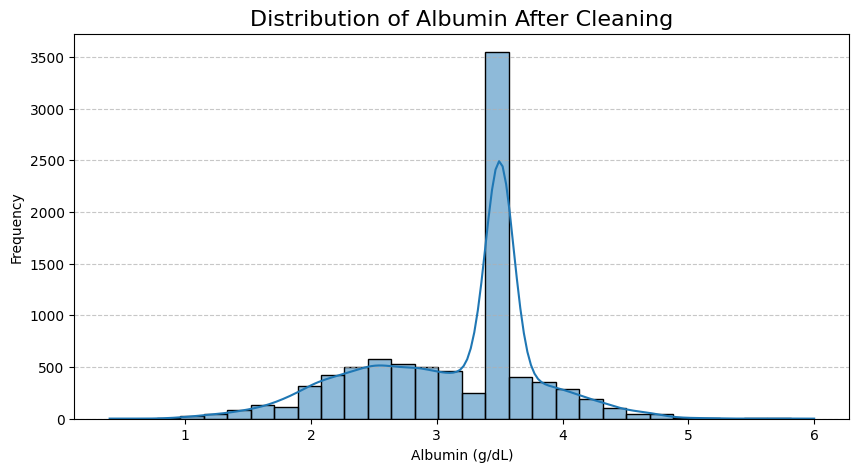

In [34]:
# Load the final, cleaned data
final_df = pd.read_csv('../data/01_processed/support_preprocessed.csv')

print("--- Final Cleaned Data Info ---")
final_df.info()

# Let's check the 'alb' column specifically
print("-- Albumin (alb) Column Statistics After Cleaning ---")
print(final_df['alb'].describe())

# Plot the distribution to visually confirm the removal of impossible values
plt.figure(figsize=(10, 5))
sns.histplot(final_df['alb'], kde=True, bins=30)
plt.title('Distribution of Albumin After Cleaning', fontsize=16)
plt.xlabel('Albumin (g/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
!python ../src/run_qc.py --visualize

Starting Data Quality Control (QC) Script

Successfully loaded preprocessed data from: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv

--- 1. Checking for Biologically/Logically Implausible Values ---
✅ No implausible values found based on defined ranges.

--- 2. Checking for Statistical Outliers (1.5 * IQR Rule) ---

[INFO] Found 52 statistical outliers in 'age' (Bounds: [20.83, 105.99]).
Extreme examples:
         age
2596  20.821
5136  20.767
1403  20.731
593   20.693
8410  20.679

[INFO] Found 6 statistical outliers in 'meanbp' (Bounds: [-3.00, 173.00]).
Extreme examples:
      meanbp
3070   195.0
3672   193.0
5650   187.0
5916   180.0
8936   178.0

[INFO] Found 414 statistical outliers in 'wblc' (Bounds: [-5.30, 27.50]).
Extreme examples:
          wblc
7406  200.0000
5339  128.7812
2867  117.0000
1315  112.1875
1365  110.0000

[INFO] Found 38 statistical outliers in 'hrt' (Bounds: [0.00, 192.00]).
Extreme examples:
        hrt
7075  